In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import  keras
import warnings

In [109]:
warnings.simplefilter(action='ignore')
plt.style.use('fivethirtyeight')

In [110]:
data = pd.read_csv("Gradution Students Data.csv")
data

,Type_Education,Course,Faculty,Education_group,Sex,Age,status,Diploma_grade,Acceptance type,Status_admission,Study_leave,Conditonal_semester,Failed_units,Left_units,Units_received,Units_passed,Overall_grade,Summer_semester,Semester,Outcome
0,Daily,Bachelor,Faculty of Agriculture and Natural Resources,Agricultural economics,Woman,24.0,Native,16.63,National exam,3.0,0,0.0,5.0,0.0,145.0,140.0,15.37,1.0,8.0,1
1,Daily,Discontinuous Bachelor,Faculty of Agriculture and Natural Resources,Plant products,Man,22.0,Non Native,NaN,National exam,5.0,0,0.0,0.0,3.0,70.0,70.0,16.81,1.0,5.0,0
2,Daily,Bachelor,Faculty of Technology and Engineering,Civil,Man,23.0,Non Native,16.85,National exam,3.0,0,1.0,15.0,0.0,156.0,141.0,14.09,2.0,9.0,0
3,Daily,Discontinuous Bachelor,Faculty of Technology and Engineering,Civil,Man,23.0,Non Native,NaN,National exam,5.0,0,0.0,10.0,5.0,78.0,68.0,15.16,0.0,5.0,0
4,Daily,Associate,Faculty of Technology and Engineering,architectural,Woman,22.0,Native,17.10,National exam,4.0,0,0.0,0.0,0.0,73.0,73.0,15.31,1.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,Daily,Associate,Faculty of Agriculture and Natural Resources,Plant products,Woman,21.0,Native,NaN,National exam,3.0,0,0.0,0.0,0.0,74.0,74.0,16.63,1.0,4.0,1
6723,Daily,Associate,Faculty of Agriculture and Natural Resources,Plant products,Man,21.0,Non Native,15.73,National exam,4.0,0,0.0,0.0,0.0,74.0,74.0,15.66,1.0,4.0,1
6724,Second Term,Bachelor,Faculty of Technology and Engineering,Civil,Man,NaN,Non Native,15.86,National exam,2.0,0,7.0,67.0,54.0,153.0,86.0,10.51,0.0,NaN,0
6725,Daily,Discontinuous Bachelor,Faculty of Agriculture and Natural Resources,Plant products,Man,25.0,Non Native,NaN,National exam,6.0,0,2.0,24.0,3.0,94.0,70.0,12.14,2.0,6.0,0


In [111]:
data1 = pd.DataFrame(data)

In [112]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type_Education       6727 non-null   object 
 1   Course               6726 non-null   object 
 2   Faculty              6727 non-null   object 
 3   Education_group      6726 non-null   object 
 4   Sex                  6727 non-null   object 
 5   Age                  3531 non-null   float64
 6   status               6727 non-null   object 
 7   Diploma_grade        3365 non-null   float64
 8   Acceptance type      6727 non-null   object 
 9   Status_admission     6373 non-null   float64
 10  Study_leave          6727 non-null   int64  
 11  Conditonal_semester  4714 non-null   float64
 12  Failed_units         6727 non-null   float64
 13  Left_units           6727 non-null   float64
 14  Units_received       4950 non-null   float64
 15  Units_passed         4694 non-null   f

In [113]:
def describe(data1):


    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []


    for item in data1.columns:
        variables.append(item)
        dtypes.append(data1[item].dtype)
        count.append(len(data1[item]))
        unique.append(len(data1[item].unique()))
        missing.append(data1[item].isna().sum())


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })

    return output

describe(data1)

,variable,dtype,count,unique,missing value
0,Type_Education,object,6727,2,0
1,Course,object,6727,6,1
2,Faculty,object,6727,3,0
3,Education_group,object,6727,17,1
4,Sex,object,6727,2,0
5,Age,float64,6727,35,3196
6,status,object,6727,2,0
7,Diploma_grade,float64,6727,613,3362
8,Acceptance type,object,6727,9,0
9,Status_admission,float64,6727,6,354


In [114]:
data1.describe(include='all')

,Type_Education,Course,Faculty,Education_group,Sex,Age,status,Diploma_grade,Acceptance type,Status_admission,Study_leave,Conditonal_semester,Failed_units,Left_units,Units_received,Units_passed,Overall_grade,Summer_semester,Semester,Outcome
count,6727,6726,6727,6726,6727,3531.000000,6727,3365.000000,6727,6373.000000,6727.000000,4714.000000,6727.000000,6727.000000,4950.000000,4694.000000,4724.000000,6502.000000,3313.000000,6727.000000
unique,2,5,3,16,2,NaN,2,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daily,Bachelor,Faculty of Technology and Engineering,Civil,Man,NaN,Native,NaN,National exam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5397,2930,4317,1350,3716,NaN,4712,NaN,6213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,23.802605,NaN,17.071391,NaN,4.053507,0.113721,0.581459,7.053887,45.921659,84.701515,79.211973,14.773838,0.503999,6.096891,0.308756
std,NaN,NaN,NaN,NaN,NaN,33.714732,NaN,3.292444,NaN,1.223255,0.497989,1.092110,11.496151,54.061101,48.346152,42.960414,2.447395,0.757000,2.408338,0.462014
min,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,1.990000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.490000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,16.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,66.000000,68.000000,13.740000,0.000000,4.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,17.220000,NaN,4.000000,0.000000,0.000000,2.000000,5.000000,75.000000,73.000000,15.070000,0.000000,5.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,18.170000,NaN,5.000000,0.000000,1.000000,10.000000,73.000000,138.000000,136.000000,16.290000,1.000000,8.000000,1.000000


In [115]:
data2 = data1.dropna(how='any')

In [116]:
data2.describe(include='all')
#checking again data

,Type_Education,Course,Faculty,Education_group,Sex,Age,status,Diploma_grade,Acceptance type,Status_admission,Study_leave,Conditonal_semester,Failed_units,Left_units,Units_received,Units_passed,Overall_grade,Summer_semester,Semester,Outcome
count,2250,2250,2250,2250,2250,2250.000000,2250,2250.000000,2250,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000
unique,2,4,3,15,2,NaN,2,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daily,Bachelor,Faculty of Technology and Engineering,Civil,Man,NaN,Native,NaN,National exam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2011,1098,1590,559,1143,NaN,1447,NaN,2191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,22.699111,NaN,17.252160,NaN,3.430222,0.091111,0.467111,9.022667,1.210444,113.418444,104.395778,15.386720,1.104000,6.592444,0.634667
std,NaN,NaN,NaN,NaN,NaN,2.383180,NaN,2.307462,NaN,1.026883,0.392415,0.993547,12.355665,6.534568,39.606784,34.331343,1.477519,0.839674,2.441059,0.481631
min,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,1.990000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,32.000000,32.000000,11.200000,0.000000,2.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,16.342500,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,75.000000,73.000000,14.370000,1.000000,4.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,17.500000,NaN,3.000000,0.000000,0.000000,4.000000,0.000000,99.000000,75.000000,15.340000,1.000000,7.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,18.340000,NaN,4.000000,0.000000,0.000000,12.000000,0.000000,147.000000,140.000000,16.390000,2.000000,8.000000,1.000000


In [117]:
data2.isna().sum()

,0
Type_Education,0
Course,0
Faculty,0
Education_group,0
Sex,0
Age,0
status,0
Diploma_grade,0
Acceptance type,0
Status_admission,0


In [118]:
#we detect noise in  Diploma_grade column with describe()
high  =data2["Diploma_grade"].nlargest(5)
high

,Diploma_grade
4061,99.99
2326,20.00
4934,19.77
6277,19.73
4348,19.72


In [119]:
#drop out the noise
noise_Diploma_grade = data2[data2["Diploma_grade"]>20].index
data3 = data2.drop(noise_Diploma_grade)
data3.describe(include='all')

,Type_Education,Course,Faculty,Education_group,Sex,Age,status,Diploma_grade,Acceptance type,Status_admission,Study_leave,Conditonal_semester,Failed_units,Left_units,Units_received,Units_passed,Overall_grade,Summer_semester,Semester,Outcome
count,2249,2249,2249,2249,2249,2249.000000,2249,2249.000000,2249,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000
unique,2,4,3,15,2,NaN,2,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daily,Bachelor,Faculty of Technology and Engineering,Civil,Man,NaN,Native,NaN,National exam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2010,1097,1590,559,1143,NaN,1447,NaN,2190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,22.699422,NaN,17.215371,NaN,3.430414,0.091152,0.467319,9.025345,1.210983,113.404402,104.379057,15.386736,1.104491,6.591819,0.634504
std,NaN,NaN,NaN,NaN,NaN,2.383664,NaN,1.510041,NaN,1.027071,0.392497,0.993719,12.357759,6.535971,39.609989,34.329813,1.477848,0.839538,2.441421,0.481676
min,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,1.990000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,32.000000,32.000000,11.200000,0.000000,2.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,16.340000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,75.000000,73.000000,14.370000,1.000000,4.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,17.500000,NaN,3.000000,0.000000,0.000000,4.000000,0.000000,99.000000,75.000000,15.340000,1.000000,7.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,18.340000,NaN,4.000000,0.000000,0.000000,12.000000,0.000000,147.000000,140.000000,16.390000,2.000000,8.000000,1.000000


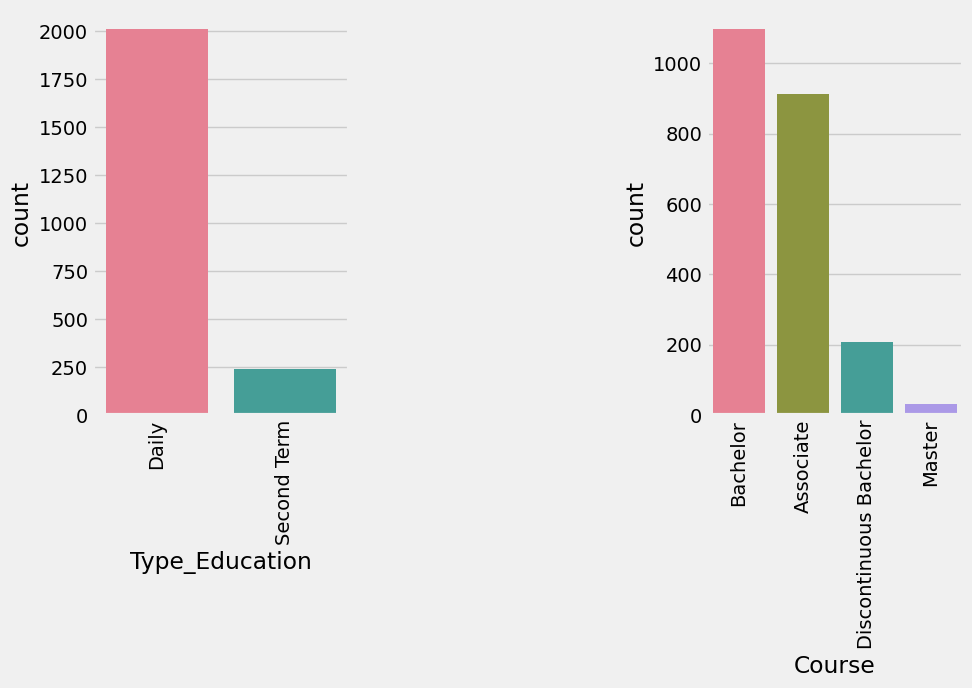

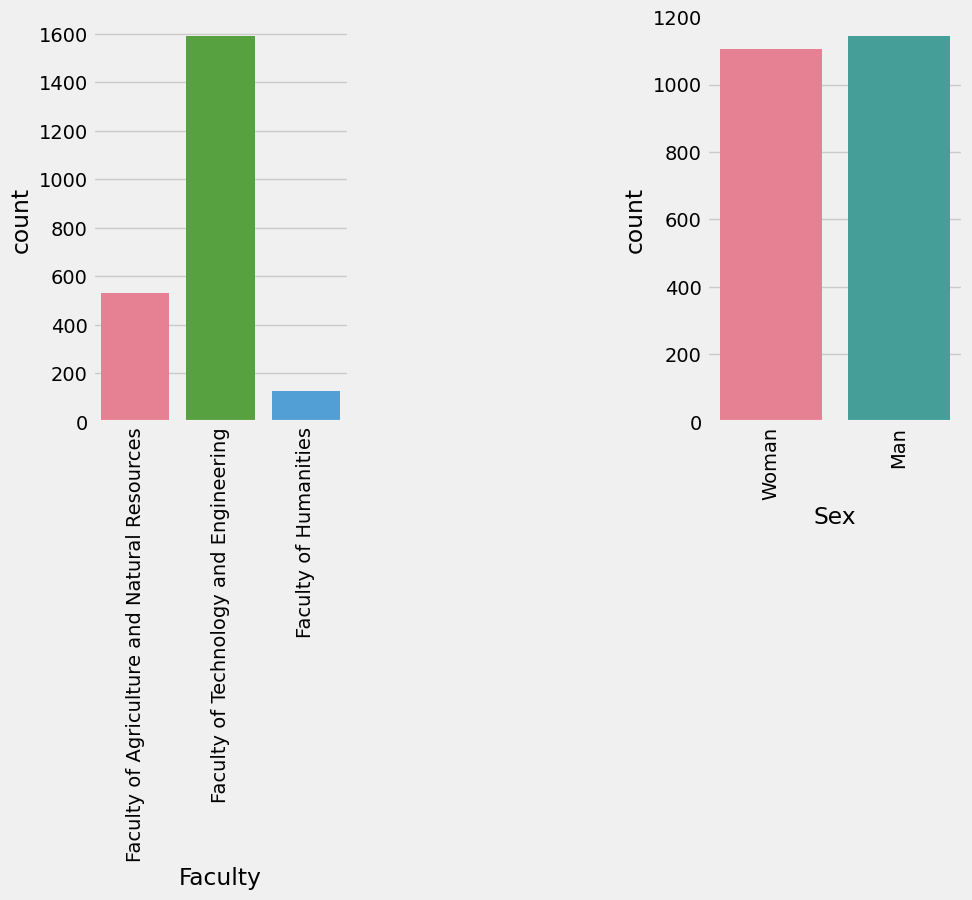

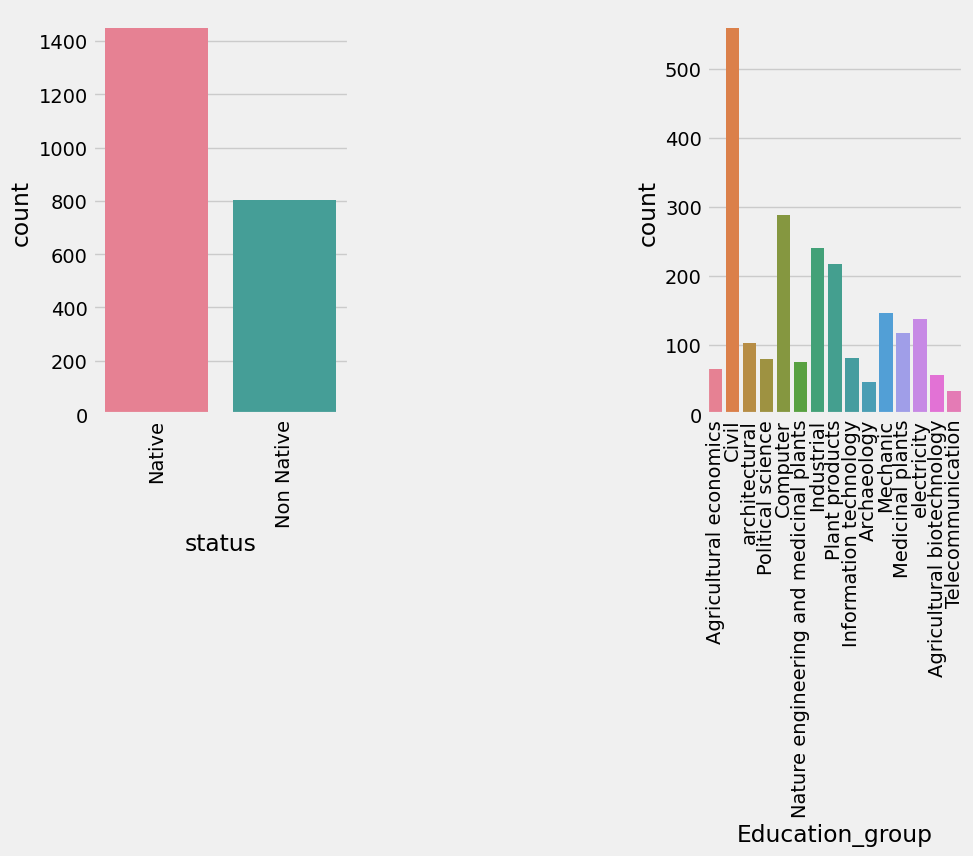

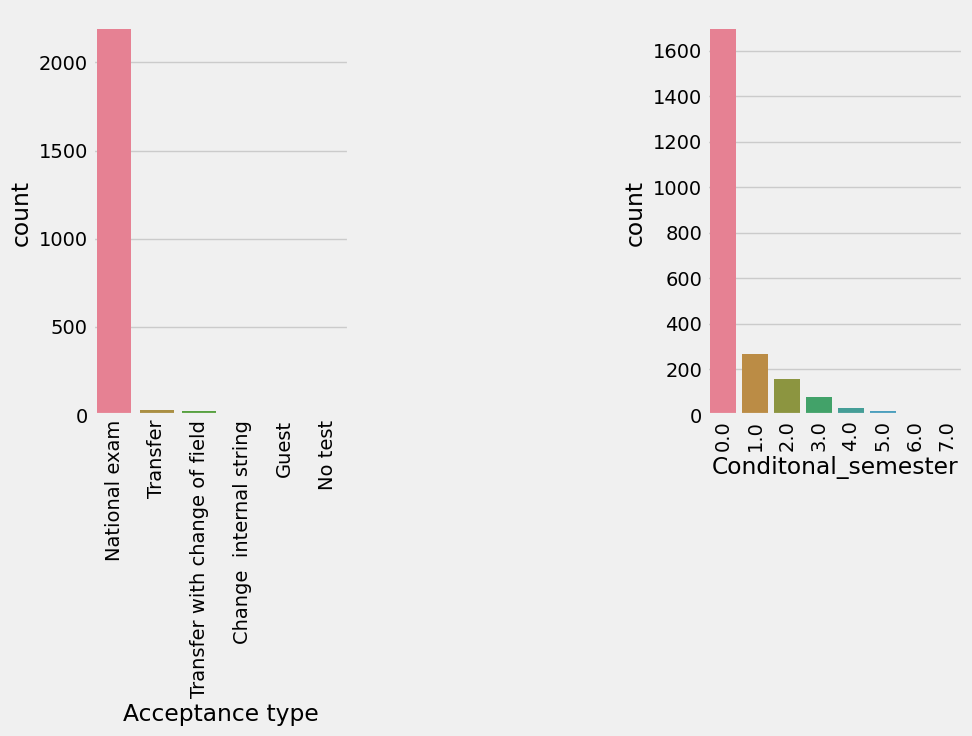

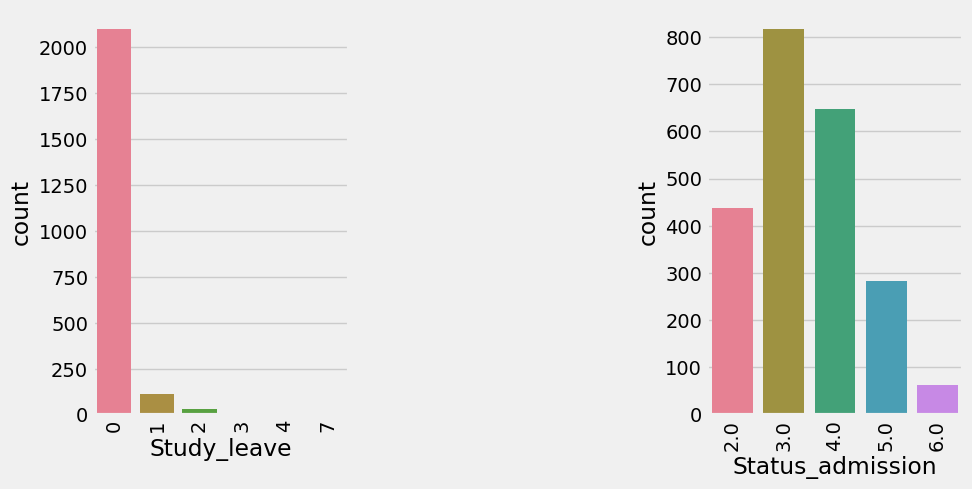

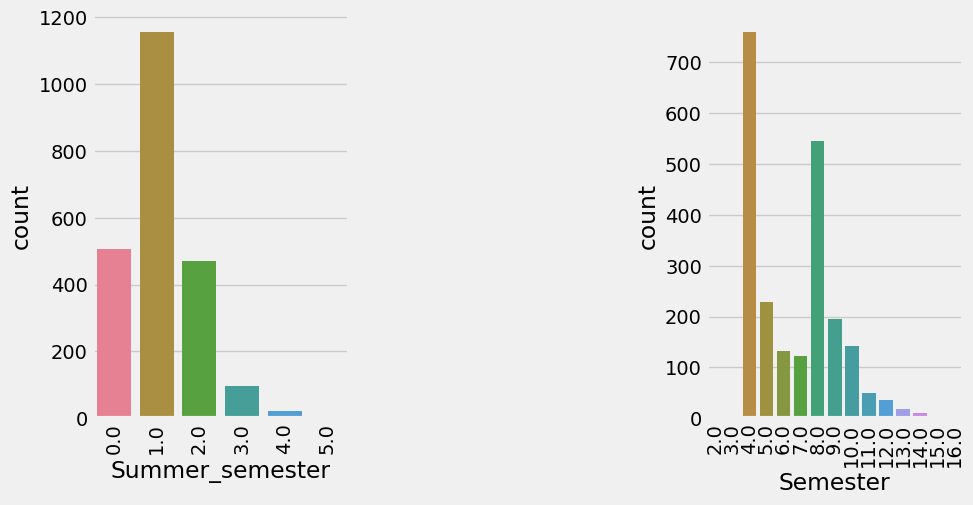

In [120]:
#types of columns
#categorical plotting
categorical = ['Type_Education', 'Course', 'Faculty', 'Sex', 'status','Education_group','Acceptance type','Conditonal_semester','Study_leave','Status_admission','Summer_semester','Semester']
i = 0
while i < 12:
    fig = plt.figure(figsize=[10,5])
    plt.subplot(1,3,1)
    plt.xticks(rotation=90)
    sns.countplot(x=categorical[i], data= data3, palette="husl")
    i+= 1
    plt.subplot(1,3,3)
    plt.xticks(rotation=90)
    sns.countplot(x=categorical[i], data= data3, palette="husl")
    i+= 1
    plt.show()


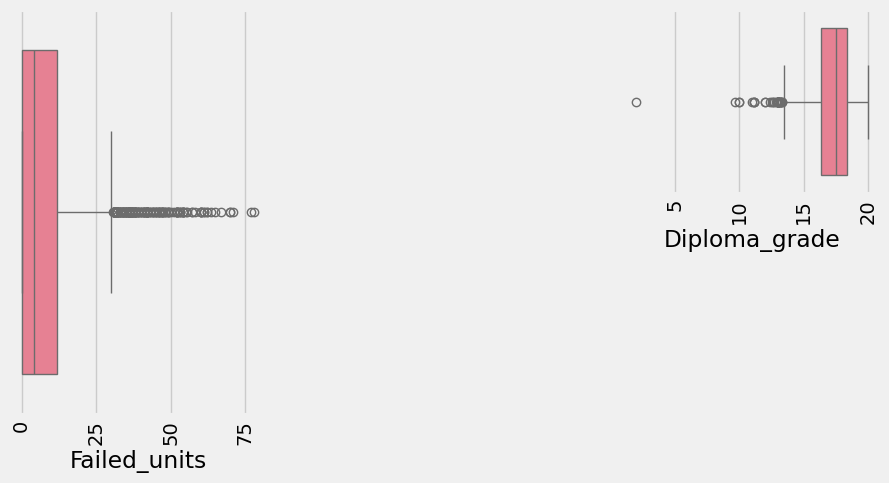

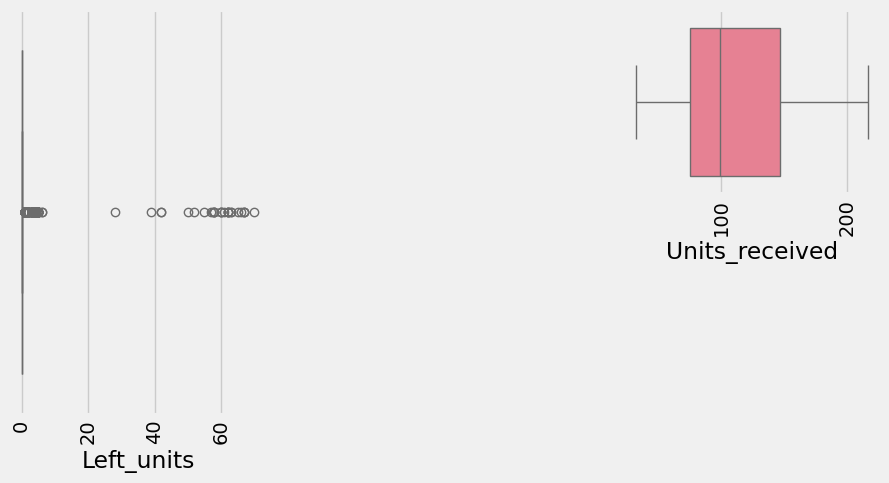

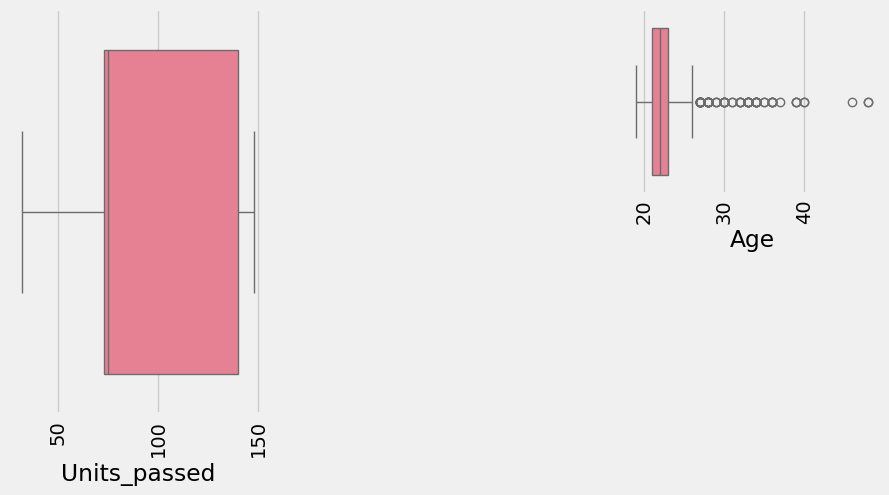

In [121]:
#Numerical plotting
Numerical = ['Failed_units', 'Diploma_grade', 'Left_units','Units_received','Units_passed','Age']
i = 0
while i < 6:
    fig = plt.figure(figsize=[10,5])
    plt.subplot(1,3,1)
    plt.xticks(rotation=90)
    sns.boxplot(x=Numerical[i], data= data3, palette="husl")
    i+= 1
    plt.subplot(2,3,3)
    plt.xticks(rotation=90)
    sns.boxplot(x=Numerical[i], data= data3, palette="husl")
    i+= 1
    plt.show()

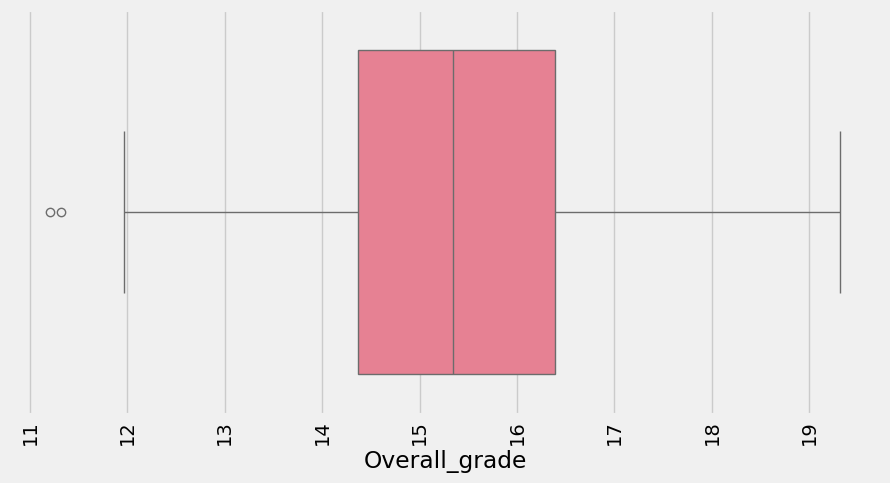

In [122]:
fig = plt.figure(figsize=[10,5])   #plotting the overall grade seperated to see beter and show the importance
plt.xticks(rotation=90)
sns.boxplot(x='Overall_grade', data= data3, palette="husl")
plt.show()

In [123]:
#categorical = ['Type_Education', 'Course', 'Faculty', 'Sex', 'status','Education_group','Acceptance type']
#print the unique values of each categorical columns to change them  numerical classification
print(pd.unique(data3['Type_Education']))
print(pd.unique(data3['Course']))
print(pd.unique(data3['Faculty']))
print(pd.unique(data3['Sex']))
print(pd.unique(data3['status']))
print(pd.unique(data3['Education_group']))
print(pd.unique(data3['Acceptance type']))

['Daily' 'Second Term']
['Bachelor' 'Associate' 'Discontinuous Bachelor' 'Master']
['Faculty of Agriculture and Natural Resources'
 'Faculty of Technology and Engineering' 'Faculty of Humanities']
['Woman' 'Man']
['Native' 'Non Native']
['Agricultural economics' 'Civil' 'architectural' 'Political science'
 'Computer' 'Nature engineering and medicinal plants' 'Industrial'
 'Plant products' 'Information technology' 'Archaeology' 'Mechanic'
 'Medicinal plants' 'electricity' 'Agricultural biotechnology'
 'Telecommunication']
['National exam' 'Transfer' 'Transfer with change of field'
 'Change  internal string' 'Guest' 'No test']


In [124]:
#replacing string data to numerical
data3['Type_Education'].replace({'Daily':2,'Second Term':3 }, inplace=True)
data3['Course'].replace({'Bachelor':2, 'Associate':3, 'Discontinuous Bachelor':4, 'Master':5}, inplace=True)
data3['Faculty'].replace({'Faculty of Agriculture and Natural Resources':2,
                          'Faculty of Technology and Engineering':3, 'Faculty of Humanities':4}, inplace=True)
data3['Sex'].replace({'Woman':2, 'Man':3}, inplace=True)
data3['status'].replace({'Native':2, 'Non Native':3}, inplace=True)
data3['Education_group'].replace({'Agricultural economics':2, 'Civil':3, 'architectural':4, 'Political science':5,
                                  'Computer':6, 'Nature engineering and medicinal plants':7, 'Industrial':8,
                                  'Plant products':9, 'Information technology':10, 'Archaeology':11, 'Mechanic':12,
                                  'Medicinal plants':13, 'electricity':14, 'Agricultural biotechnology':15,
                                  'Telecommunication':16}, inplace=True)
data3['Acceptance type'].replace({'National exam':7, 'Transfer':6, 'Transfer with change of field':5,
                                  'Change  internal string':4, 'Guest':3, 'No test':2}, inplace=True)
data3

,Type_Education,Course,Faculty,Education_group,Sex,Age,status,Diploma_grade,Acceptance type,Status_admission,Study_leave,Conditonal_semester,Failed_units,Left_units,Units_received,Units_passed,Overall_grade,Summer_semester,Semester,Outcome
0,2,2,2,2,2,24.0,2,16.63,7,3.0,0,0.0,5.0,0.0,145.0,140.0,15.37,1.0,8.0,1
2,2,2,3,3,3,23.0,3,16.85,7,3.0,0,1.0,15.0,0.0,156.0,141.0,14.09,2.0,9.0,0
4,2,3,3,4,2,22.0,2,17.10,7,4.0,0,0.0,0.0,0.0,73.0,73.0,15.31,1.0,4.0,1
6,2,3,3,3,2,22.0,3,18.09,7,3.0,0,0.0,3.0,0.0,76.0,73.0,16.18,1.0,4.0,1
8,2,2,4,5,2,22.0,2,16.18,7,4.0,0,0.0,0.0,4.0,136.0,136.0,18.04,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6716,2,3,3,6,2,20.0,3,17.45,7,4.0,0,0.0,0.0,0.0,73.0,73.0,18.09,0.0,4.0,1
6717,2,3,3,3,3,22.0,2,18.80,7,3.0,0,0.0,5.0,0.0,78.0,73.0,14.38,2.0,4.0,1
6719,2,3,2,9,2,23.0,2,18.60,7,4.0,0,0.0,0.0,0.0,74.0,74.0,16.51,1.0,4.0,1
6720,2,3,2,9,2,20.0,2,17.95,7,3.0,0,0.0,2.0,0.0,76.0,74.0,13.96,1.0,4.0,1


In [125]:
#correlation between features
data3.corr()

,Type_Education,Course,Faculty,Education_group,Sex,Age,status,Diploma_grade,Acceptance type,Status_admission,Study_leave,Conditonal_semester,Failed_units,Left_units,Units_received,Units_passed,Overall_grade,Summer_semester,Semester,Outcome
Type_Education,1.000000,-0.159313,0.084901,-0.044642,0.079462,0.093742,-0.048881,0.043537,-0.173254,-0.029322,0.022850,0.094846,0.150578,0.031149,0.241964,0.224976,-0.128917,0.080836,0.242086,-0.079833
Course,-0.159313,1.000000,-0.262090,-0.110189,-0.087843,0.074266,0.067924,-0.215016,0.029331,0.413565,0.033029,-0.122175,-0.276072,-0.065160,-0.862615,-0.895914,0.028133,-0.181243,-0.731331,0.061515
Faculty,0.084901,-0.262090,1.000000,-0.232904,0.215750,-0.081043,0.037140,-0.006240,-0.003851,-0.093887,0.008693,0.097548,0.159207,0.027919,0.284456,0.270897,-0.071840,0.079199,0.218994,-0.034412
Education_group,-0.044642,-0.110189,-0.232904,1.000000,-0.022947,0.095733,-0.025339,-0.093060,0.006709,0.087413,-0.027290,-0.008233,0.088405,0.048658,0.170441,0.164833,0.052424,-0.038901,0.141514,-0.027626
Sex,0.079462,-0.087843,0.215750,-0.022947,1.000000,0.076717,0.045311,-0.235844,0.013908,0.017355,-0.004955,0.227257,0.300045,0.075860,0.203058,0.126282,-0.233632,0.240078,0.221743,-0.166660
Age,0.093742,0.074266,-0.081043,0.095733,0.076717,1.000000,-0.059961,-0.247574,-0.026323,0.201863,0.194285,0.154542,0.170535,0.036408,0.168973,0.133574,0.006178,-0.075882,0.274116,-0.177476
status,-0.048881,0.067924,0.037140,-0.025339,0.045311,-0.059961,1.000000,-0.011706,0.058115,-0.021870,0.009217,-0.028768,-0.072454,-0.060759,-0.093618,-0.081936,0.066978,-0.013052,-0.078586,0.077351
Diploma_grade,0.043537,-0.215016,-0.006240,-0.093060,-0.235844,-0.247574,-0.011706,1.000000,-0.053927,-0.192177,-0.033175,-0.155813,-0.132812,-0.051978,0.099321,0.162406,0.216887,0.080550,0.052405,0.147843
Acceptance type,-0.173254,0.029331,-0.003851,0.006709,0.013908,-0.026323,0.058115,-0.053927,1.000000,-0.005734,-0.009896,0.018319,-0.004119,0.024522,-0.026804,-0.029444,-0.002697,-0.069059,-0.066892,0.082706
Status_admission,-0.029322,0.413565,-0.093887,0.087413,0.017355,0.201863,-0.021870,-0.192177,-0.005734,1.000000,0.069260,0.029915,-0.021871,0.048392,-0.208012,-0.232133,-0.004259,-0.105319,-0.121322,-0.030752


In [126]:
corrmat = data3.corr()

<Axes: >

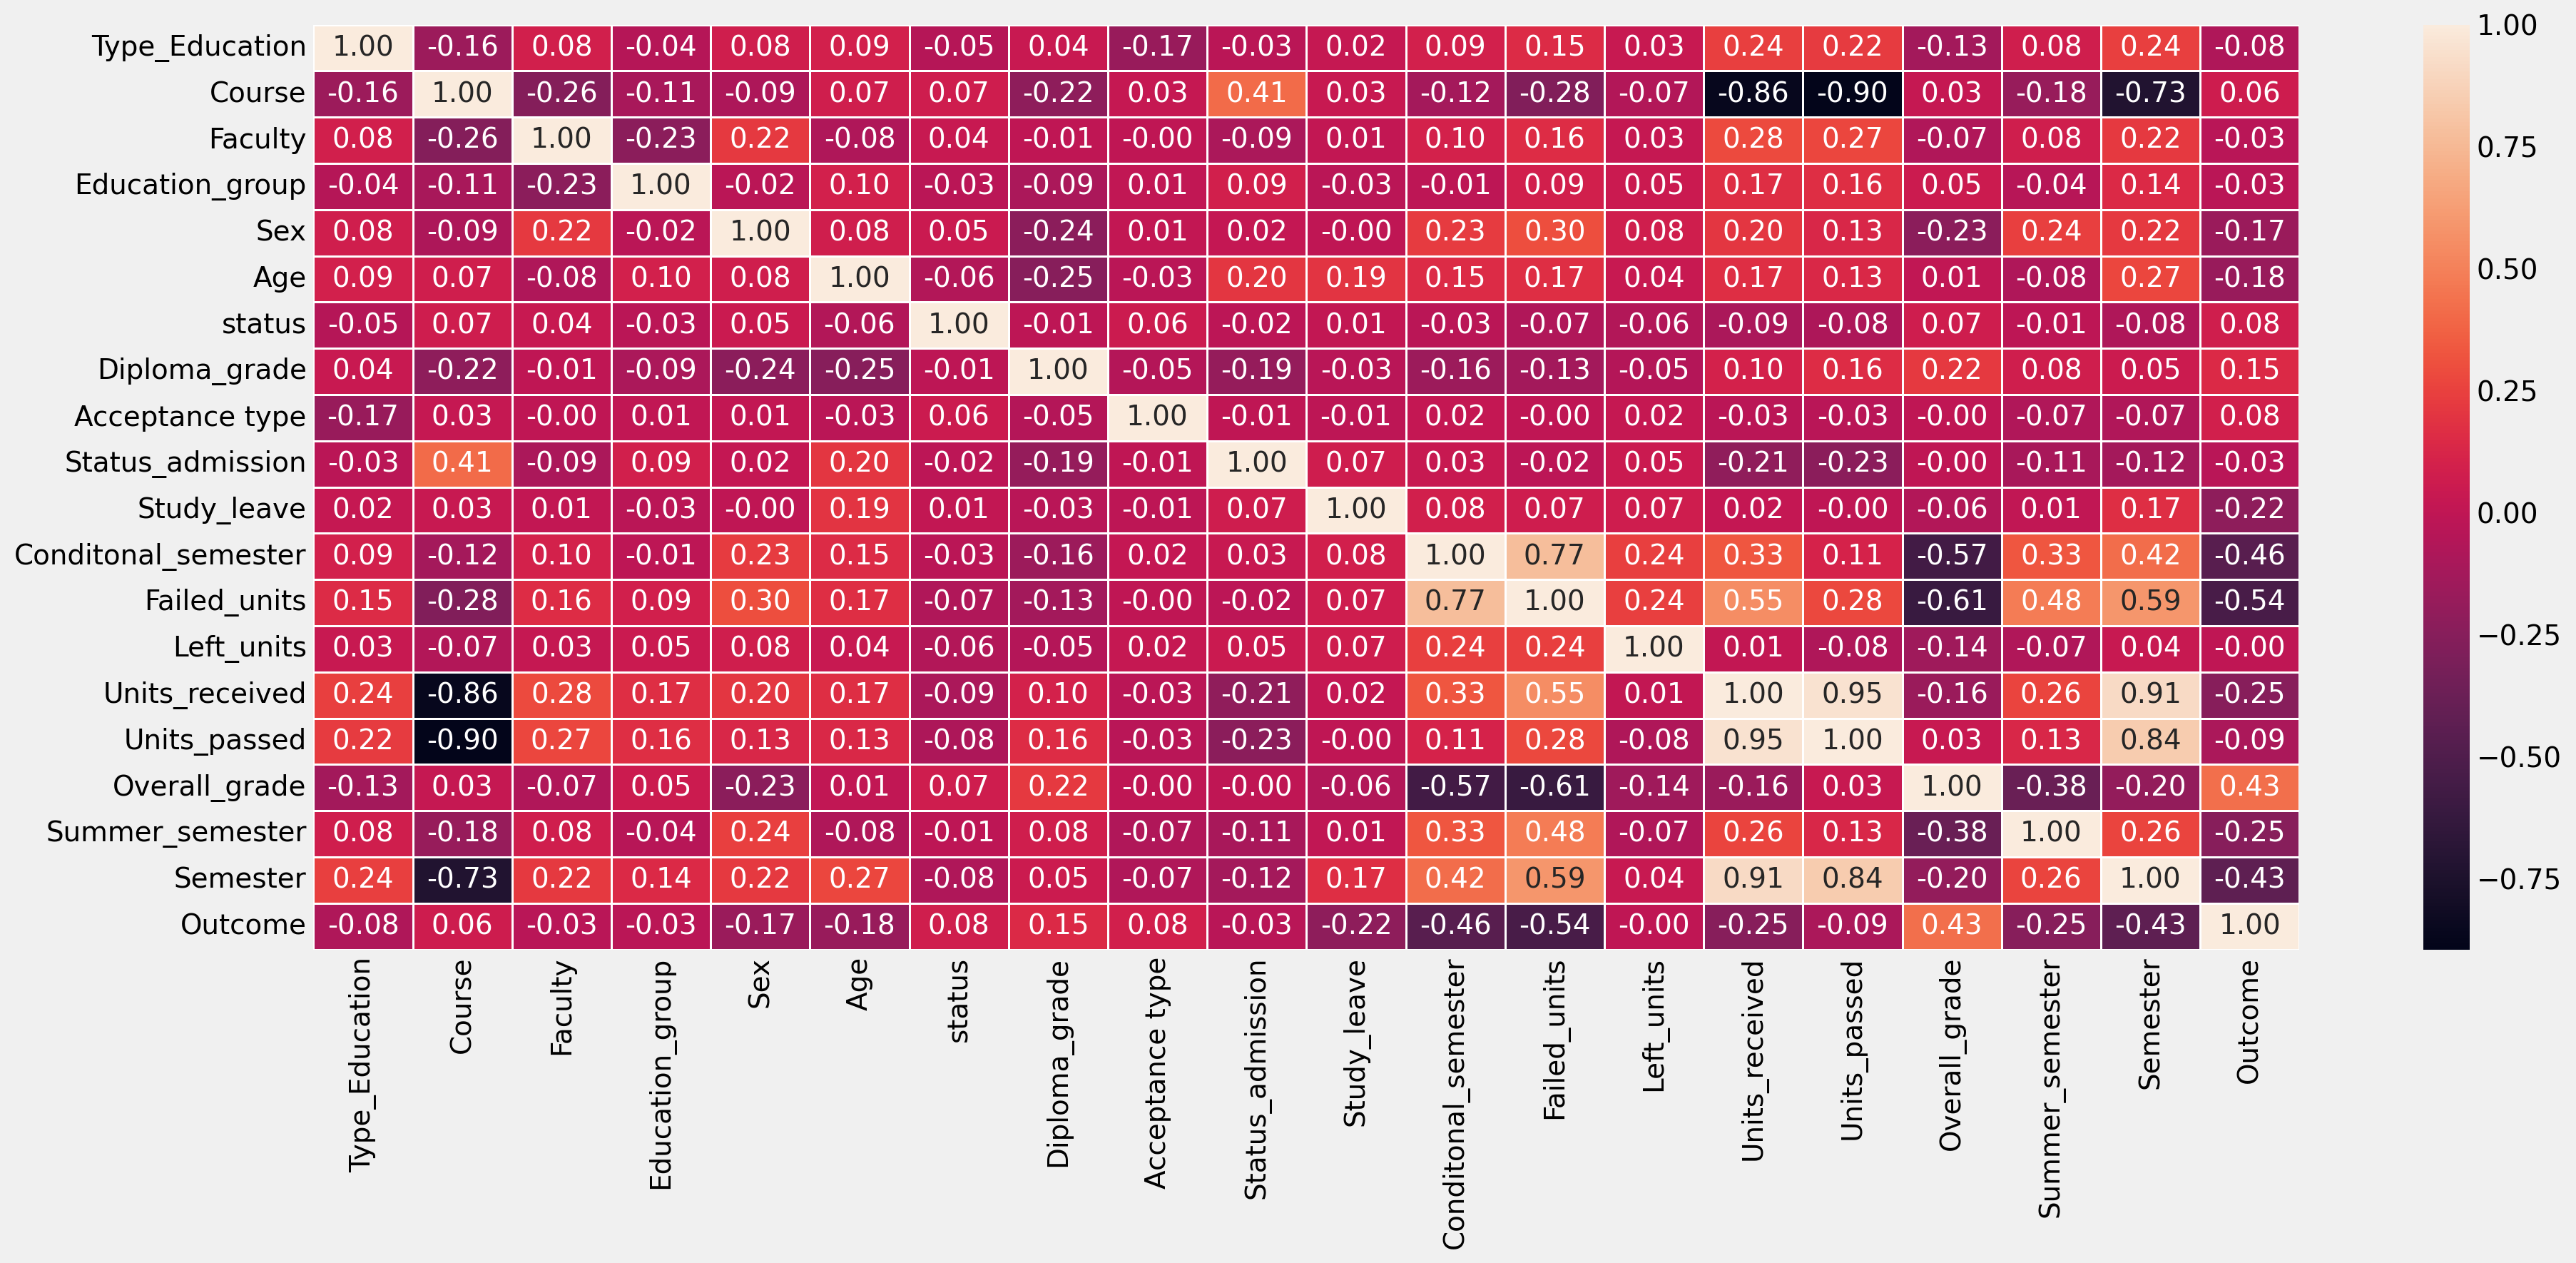

In [127]:
#plot the  features correlation
plt.figure(figsize=(20, 8), dpi=200)
sns.heatmap(corrmat, annot=True,fmt=".2f", linewidth=.5)

In [128]:
# Drop the columns 'Outcome' and 'Semester' from the dataset 'data3' to create feature set 'x'
x = data3.drop(columns=['Outcome', 'Semester'], axis=1)

# Extract the 'Outcome' column as the target variable 'y' and reshape it to be a 2D array
y = data3.Outcome.values.reshape(-1, 1)

# Split the dataset into training and testing sets (75% training, 25% testing) with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [129]:
# Initialize the logistic regression model with a specific solver ('liblinear') and regularization strength (C=50)
logreg = LogisticRegression(solver='liblinear', C=50)

# Fit the logistic regression model on the training data
logreg.fit(x_train, y_train.ravel())

# Predict the target variable on the test data using the trained model
y_pred_l = logreg.predict(x_test)

# Print the F1 score to evaluate the accuracy of the model's predictions on the test set
print("accuracy for logreg:", metrics.f1_score(y_test, y_pred_l))

accuracy for logreg: 0.8632138114209827


In [130]:
# Initialize a K-Fold cross-validator with 10 splits
k_fold = KFold(10)

# Perform cross-validation on the entire dataset using the logistic regression model and print the cross-validation scores
print(cross_val_score(logreg, x, y.ravel(), cv=k_fold, n_jobs=1))

[0.84       0.82666667 0.80888889 0.85333333 0.84888889 0.78666667
 0.81333333 0.83555556 0.8        0.84821429]


In [131]:
# Calculate the length of the dataset divided by 10 (used for determining fold size)
len(data3) / 10

224.9

In [132]:
# Create a subset of the data by removing rows from index 1125 to 1350 to improve model performance
data3_1 = data3[data3.index < 1125]   # Select rows where the index is less than 1125
data3_2 = data3[data3.index > 1350]   # Select rows where the index is greater than 1350

# Combine the two subsets to create a new dataset 'data4'
data4 = data3_1._append(data3_2)

# Reset the index of the new dataset 'data4' to maintain sequential indexing and drop the old index
data4.reset_index(drop=True, inplace=True)

In [133]:
# Drop the 'Outcome' column from 'data4' to create the feature set 'x'
xl = data4.drop(columns=['Outcome', 'Semester'], axis=1)

# Extract the 'Outcome' column as the target variable 'y' and reshape it to be a 2D array
yl = data4.Outcome.values.reshape(-1, 1)

# Split the dataset into training and testing sets (75% training, 25% testing) with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(xl, yl, test_size=0.25, random_state=0)

In [134]:
# Initialize the logistic regression model with a specific solver ('liblinear') and regularization strength (C=50)
logreg = LogisticRegression(solver='liblinear', C=50)

# Fit the logistic regression model on the training data
logreg.fit(x_train, y_train.ravel())

# Predict the target variable on the test data using the trained model
y_pred_l = logreg.predict(x_test)

# Calculate the R2 score to evaluate the proportion of the variance explained by the model
r2_log = metrics.r2_score(y_test, y_pred_l)

# Print the F1 score to evaluate the accuracy of the model's predictions on the test set
acc_score_log = metrics.accuracy_score(y_test, y_pred_l)
print("accuracy for logreg:", acc_score_log)

# Print the R2 score
print("R2 score:", r2_log)

accuracy for logreg: 0.8235294117647058
R2 score: 0.2409302325581394


In [135]:
# Compute and display the confusion matrix for the entire dataset
confusion_matrix(yl, logreg.predict(xl))


array([[ 520,  276],
       [  93, 1284]])

In [136]:
# Print the classification report including precision, recall, F1 score, and support for each class
print(classification_report(yl, logreg.predict(xl)))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74       796
           1       0.82      0.93      0.87      1377

    accuracy                           0.83      2173
   macro avg       0.84      0.79      0.81      2173
weighted avg       0.83      0.83      0.82      2173



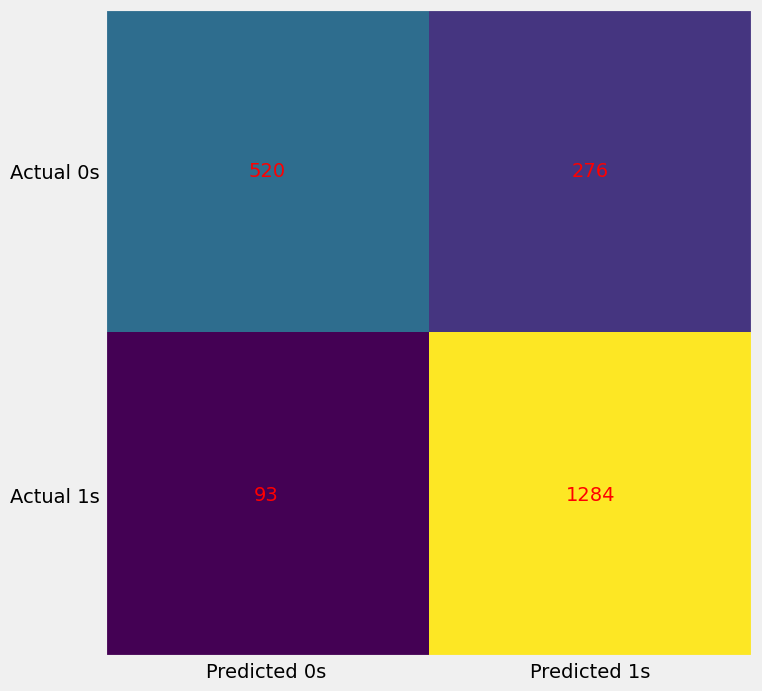

In [137]:
# Compute the confusion matrix for the entire dataset
cm = confusion_matrix(yl, logreg.predict(xl))

# Create a figure and axis object for plotting, with a fixed size of 8x8 inches
fig, ax = plt.subplots(figsize=(8, 8))

# Display the confusion matrix using the 'imshow' function to create a heatmap-like plot
ax.imshow(cm)

# Remove grid lines for a cleaner look
ax.grid(False)

# Set the x-axis ticks and labels to represent the predicted classes
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set the y-axis ticks and labels to represent the actual classes
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

# Adjust the y-axis limits to properly display all labels
ax.set_ylim(1.5, -0.5)

# Add text annotations to each cell of the confusion matrix to show the count values
for i in range(2):          # Loop over the two classes (0 and 1)
    for j in range(2):      # Loop over the two predicted classes (0 and 1)
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')  # Display the count in the cell

# Display the plot
plt.show()


In [138]:
# Define a function to test different polynomial dimensions for the model
def check(Dimension, testsize):
    # Initialize the R2 score with a base value
    r2_log = 0.7548837209302326

    # Loop through each column in the feature set 'x'
    for column in xl:
        # Create a new column name by appending the dimension to the original column name
        new_col_name = column + str(Dimension)

        # Raise each value in the column to the power of 'Dimension' to create new feature values
        new_col_val = xl[column] ** Dimension

        # Insert the new feature column at the beginning of the DataFrame
        xl.insert(0, new_col_name, new_col_val)

        # Split the modified dataset into training and testing sets with the specified test size
        x_train, x_test, y_train, y_test = train_test_split(xl, yl, test_size=testsize, random_state=0)

        # Initialize a new logistic regression model with specific solver and regularization strength
        new_logreg = LogisticRegression(solver='liblinear', C=50)

        # Fit the logistic regression model on the training data
        new_logreg.fit(x_train, y_train.ravel())

        # Predict the target variable on the test data using the trained model
        y_pred_l = new_logreg.predict(x_test)

        # Calculate the new R2 score for the model with the additional feature
        r2_new = metrics.r2_score(y_test, y_pred_l)

        # If the new R2 score is lower, remove the added column to revert to the previous feature set
        if r2_new < r2_log:
            xl.drop([new_col_name], axis=1, inplace=True)
        # Otherwise, update the R2 score to the new higher value
        else:
            r2_log = r2_new

    # Print the final R2 score after testing all columns
    print("R2 score:", r2_log)

# Call the function with a polynomial dimension of 2 and a test size of 20%
check(2, 0.2)

R2 score: 0.7548837209302326


In [139]:
# Drop the 'Outcome' column from 'data4' to create the feature set 'x'
x_knn = data4.drop(columns=['Outcome', 'Semester'], axis=1)

# Extract the 'Outcome' column as the target variable 'y' and reshape it to be a 2D array
y_knn = data4.Outcome.values.reshape(-1, 1)

# Split the dataset into training and testing sets (75% training, 25% testing) with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x_knn, y_knn, test_size=0.25, random_state=0)

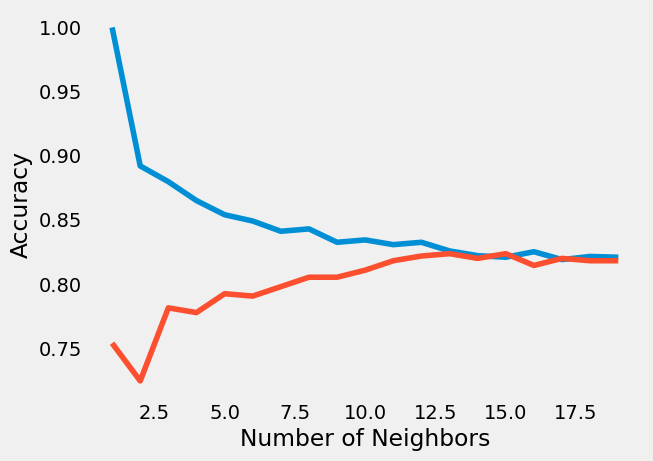

In [140]:
# Initialize empty lists to store the training and test accuracy for different numbers of neighbors
training_acc = []
test_acc = []

# Define the range of neighbor values to be tested (from 1 to 19)
neighbors_setting = range(1, 20)

# Iterate over the different values of 'n_neighbors'
for n_neighbors in neighbors_setting:
    # Initialize a K-Nearest Neighbors classifier with the current number of neighbors
    Knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit the classifier on the training data
    Knn.fit(x_train, y_train.ravel())

    # Compute and store the accuracy on the training data
    training_acc.append(Knn.score(x_train, y_train))

    # Compute and store the accuracy on the test data
    test_acc.append(Knn.score(x_test, y_test))

# Plot the accuracy of the training set against the number of neighbors
plt.plot(neighbors_setting, training_acc, label='Accuracy of the training set')

# Plot the accuracy of the test set against the number of neighbors
plt.plot(neighbors_setting, test_acc, label='Accuracy of the test set')

# Label the x-axis as "Number of Neighbors"
plt.xlabel('Number of Neighbors')

# Label the y-axis as "Accuracy"
plt.ylabel('Accuracy')

# Display a grid on the plot for better readability
plt.grid()

# Show the plot
plt.show()


In [141]:
# Set the number of neighbors for the K-Nearest Neighbors classifier
k = 13

# Initialize the K-Nearest Neighbors classifier with 'k' neighbors
KNN_clf = KNeighborsClassifier(k)

# Fit the classifier on the training data
KNN_clf.fit(x_train, y_train.ravel())

# Predict the target variable on the test data using the trained KNN classifier
y_pred_knn = KNN_clf.predict(x_test)

In [142]:
# Print the accuracy score of the KNN model on the test data
acc_score_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("accuracy:", acc_score_knn)


accuracy: 0.8235294117647058


In [143]:
# Compute and display the confusion matrix for the entire dataset
confusion_matrix(y_knn, KNN_clf.predict(x_knn))

array([[ 512,  284],
       [  96, 1281]])

In [144]:
# Print the classification report including precision, recall, F1 score, and support for each class
print(classification_report(y_knn, KNN_clf.predict(x_knn)))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73       796
           1       0.82      0.93      0.87      1377

    accuracy                           0.83      2173
   macro avg       0.83      0.79      0.80      2173
weighted avg       0.83      0.83      0.82      2173



In [145]:
# Create a new DataFrame 'data5' from 'data4' (deep copy to avoid modifying the original data)
data5 = pd.DataFrame(data4)

In [146]:
# Drop the 'Outcome' and 'Semester' columns from 'data5' to create the feature set 'xd'
xd = data5.drop(columns=['Outcome', 'Semester'], axis=1)

# Extract the 'Outcome' column as the target variable 'yd' and reshape it to be a 2D array
yd = data5.Outcome.values.reshape(-1, 1)

In [147]:
# Split the dataset into training and testing sets (75% training, 25% testing) with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(xd, yd, test_size=0.25, random_state=0)

In [148]:
# Initialize the Decision Tree Classifier with 'entropy' criterion and a maximum depth of 2
DT_clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Fit the Decision Tree Classifier on the training data
DT_clf.fit(x_train, y_train)

# Predict the target variable on the test data using the trained Decision Tree model
y_pred_dt = DT_clf.predict(x_test)

# Print the accuracy score of the Decision Tree model on the test data
acc_score_dt = metrics.accuracy_score(y_test, y_pred_dt)
print("accuracy:", acc_score_dt)

accuracy: 0.8253676470588235


In [149]:
# Export the structure of the trained Decision Tree classifier as a text representation
text_presentation = tree.export_text(DT_clf)

# Print the text representation of the Decision Tree to the console
print(text_presentation)

|--- feature_12 <= 9.50
|   |--- feature_10 <= 0.50
|   |   |--- class: 1
|   |--- feature_10 >  0.50
|   |   |--- class: 0
|--- feature_12 >  9.50
|   |--- feature_14 <= 166.50
|   |   |--- class: 0
|   |--- feature_14 >  166.50
|   |   |--- class: 0



In [150]:
# Open (or create) a file named "decision_tree.log" in write mode to save the text representation
with open("decision_tree.log", "w") as fout:
    fout.write(text_presentation)  # Write the text representation of the Decision Tree to the file

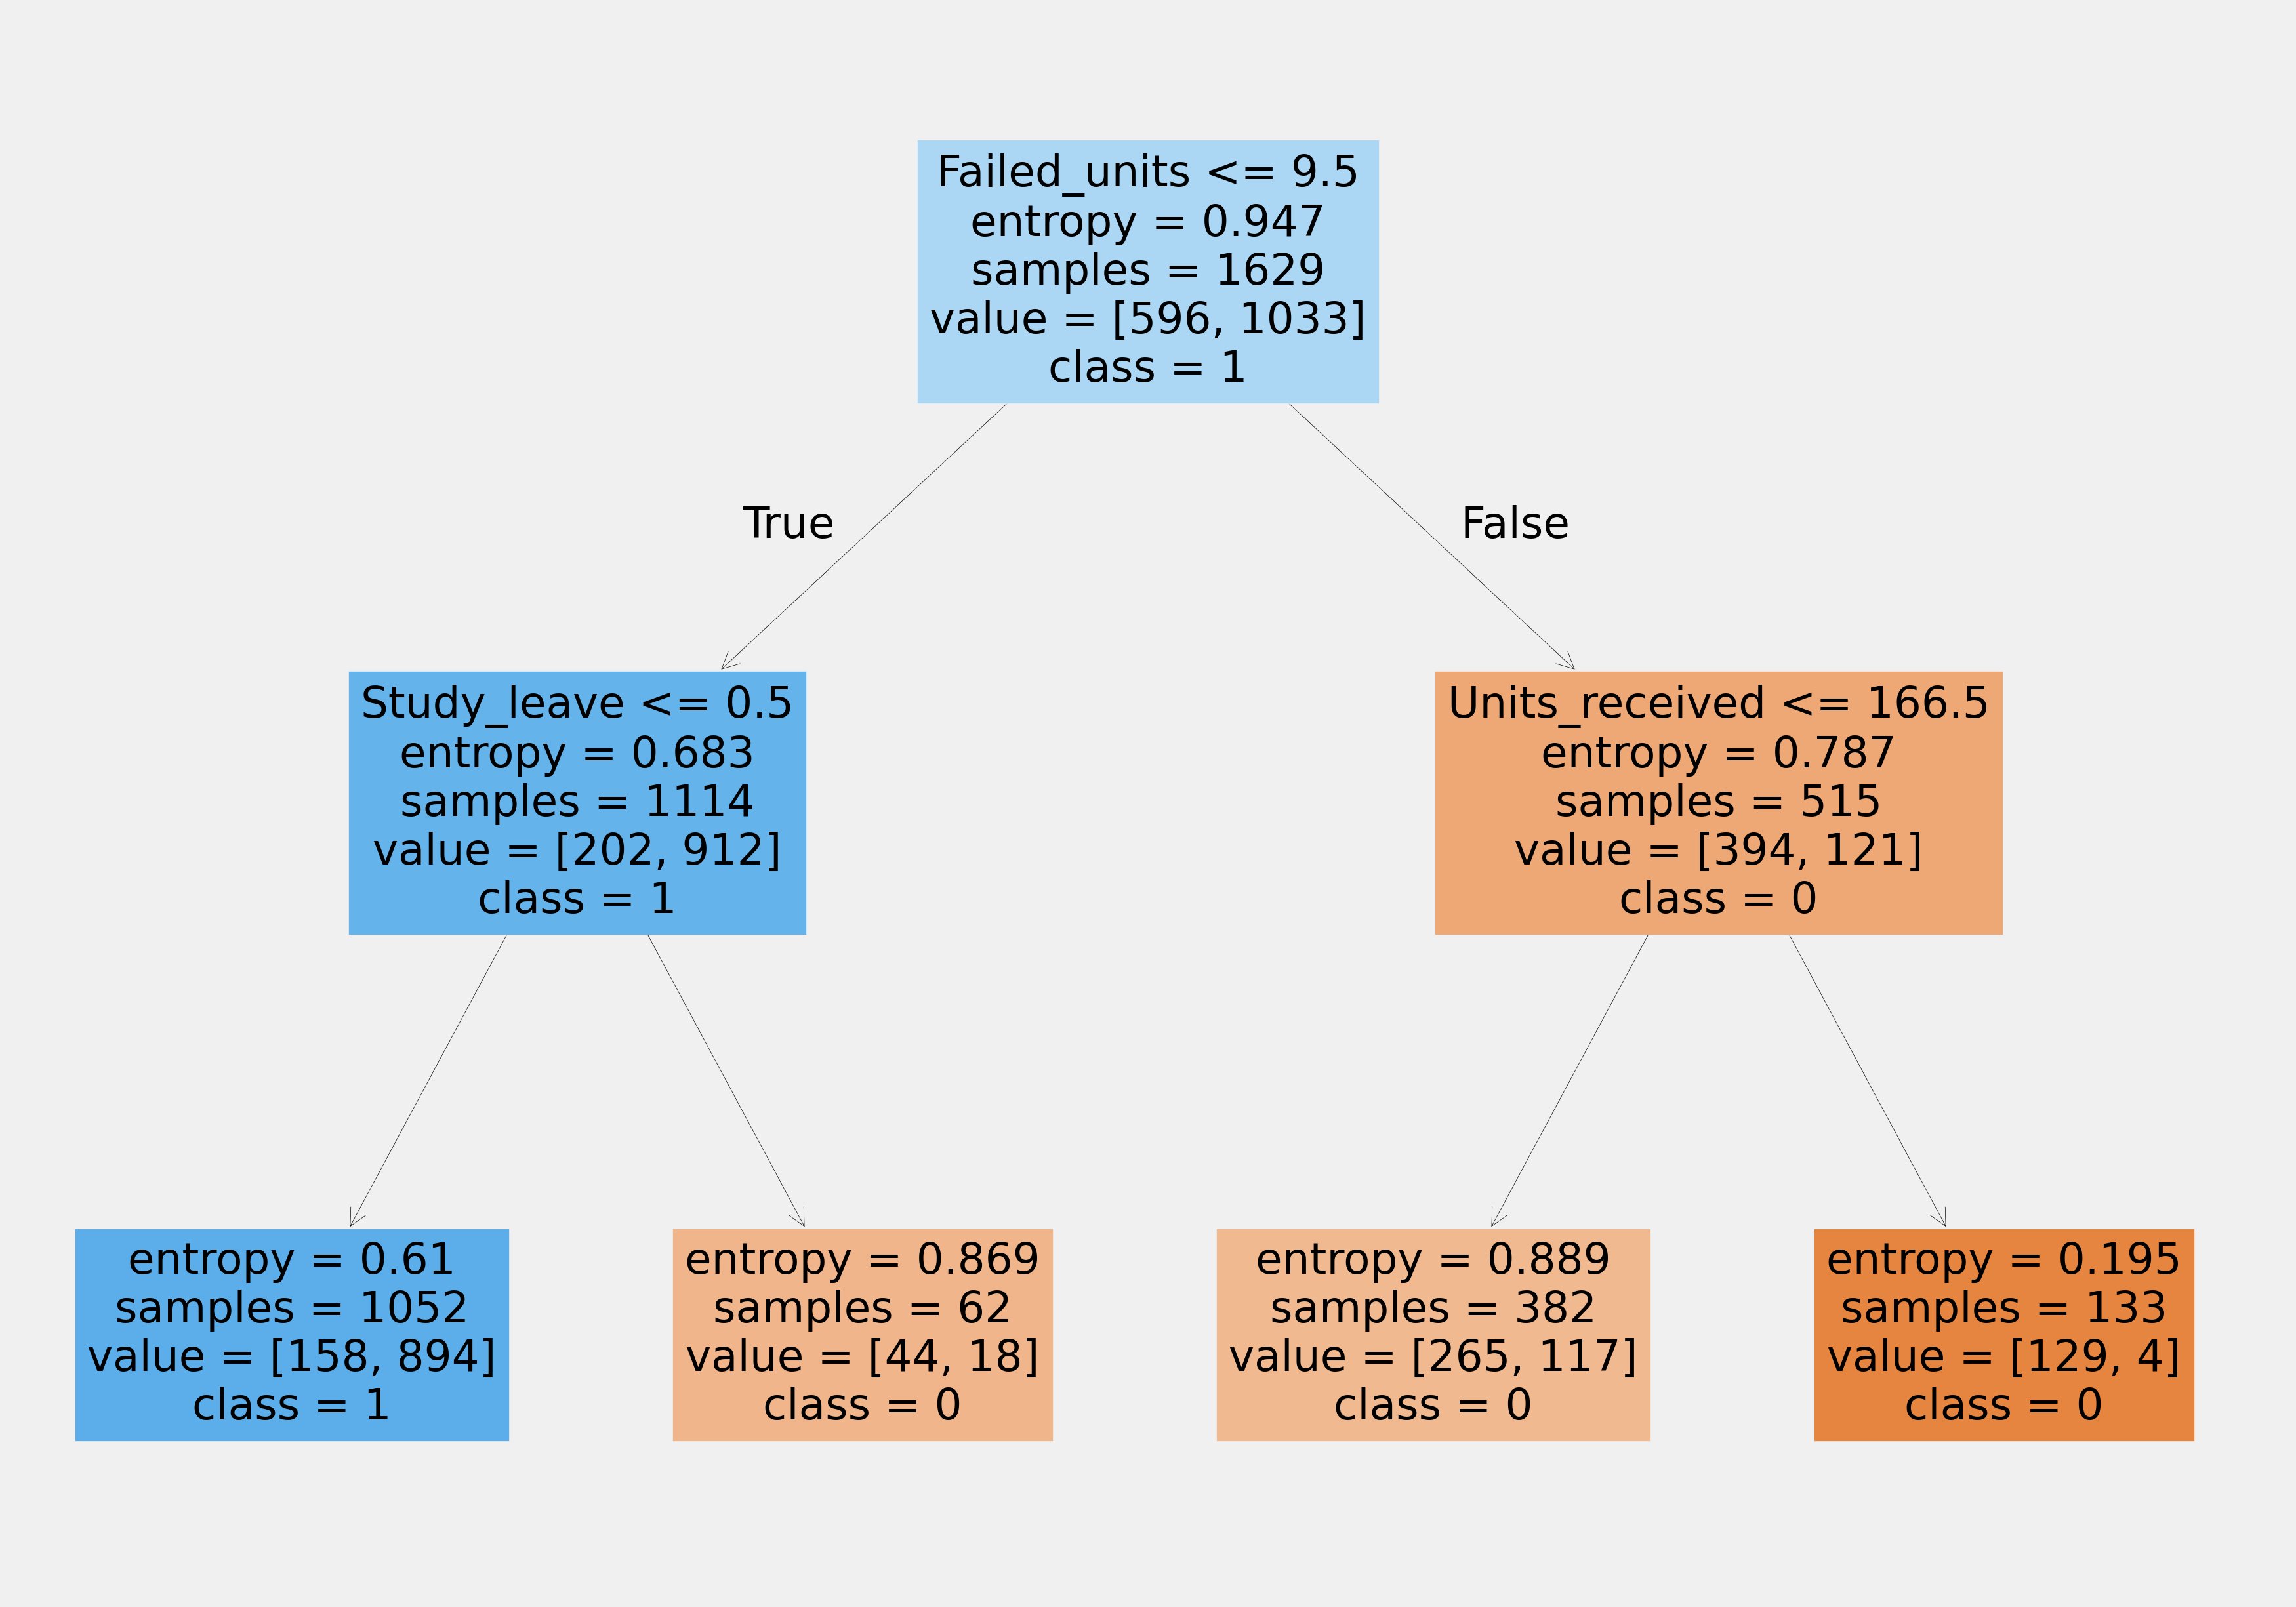

In [151]:
# Define the feature names used in the Decision Tree for better interpretability of the tree plot
feature_names = [
    "Type_Education",
    "Course",
    "Faculty",
    "Education_group",
    "Sex",
    "Age",
    "status",
    "Diploma_grade",
    "Acceptance type",
    "Status_admission",
    "Study_leave",
    "Conditonal_semester",
    "Failed_units",
    "Left_units",
    "Units_received",
    "Units_passed",
    "Overall_grade",
    "Summer_semester"
]

# Define the target class names (e.g., '0' and '1' for binary classification)
target_names = ["0", "1"]

# Create a new figure for plotting the Decision Tree with a specified size
fig = plt.figure(figsize=(40, 30))

# Plot the Decision Tree using matplotlib, specifying feature names, target class names, and filled colors
plot = tree.plot_tree(
    DT_clf,
    feature_names=feature_names,
    class_names=target_names,
    filled=True
)

# Save the plotted Decision Tree figure as a PNG file named "tree1.png"
fig.savefig("tree1.png")

In [152]:
# Evaluate Decision Tree Classifier Performance (assuming y and DT_clf are defined)
confusion_matrix(yd, DT_clf.predict(xd))  # Calculate confusion matrix for DT_clf

array([[ 575,  221],
       [ 171, 1206]])

In [153]:
print(classification_report(yd, DT_clf.predict(xd)))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       796
           1       0.85      0.88      0.86      1377

    accuracy                           0.82      2173
   macro avg       0.81      0.80      0.80      2173
weighted avg       0.82      0.82      0.82      2173



In [154]:
# Prepare Data for Training and Testing a Random Forest Classifier
xr = data5.drop(columns=['Outcome', 'Semester'], axis=1)  # Extract features from data5
yr = data5.Outcome.values.reshape(-1, 1)  # Extract target variable and reshape

In [155]:
x_train, x_test, y_train, y_test = train_test_split(xr, yr, test_size= 0.25, random_state=0)

In [156]:
# Train a Random Forest Classifier
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2)  # Create RF with 100 trees, max depth 2
RF_clf.fit(x_train, y_train)  # Train the RF classifier on the training data

# Evaluate Random Forest Classifier Performance
y_pred_rf = RF_clf.predict(x_test)  # Predict labels for the testing set

 # Print accuracy score
acc_score_rf = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:", acc_score_rf)


accuracy: 0.7941176470588235


In [157]:
# Evaluate Random Forest Classifier Performance (assuming y is still defined)
confusion_matrix(yr, RF_clf.predict(xr))

array([[ 480,  316],
       [ 109, 1268]])

In [158]:
# Calculate confusion matrix for RF_clf
print(classification_report(yr, RF_clf.predict(xr)))  # Print classification report for RF_clf

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       796
           1       0.80      0.92      0.86      1377

    accuracy                           0.80      2173
   macro avg       0.81      0.76      0.77      2173
weighted avg       0.81      0.80      0.80      2173



In [159]:
xdnn = data5.drop(columns=['Outcome', 'Semester'], axis=1)
ydnn = data5.Outcome.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(xdnn, ydnn, test_size=0.25, random_state=42)

In [160]:
model =keras.Sequential()
model.add(keras.layers.Dense(units=256, activation='relu', input_shape=[18]))

model.add(keras.layers.Dense(units=256, activation='relu'))

model.add(keras.layers.Dense(units=256, activation='relu'))

model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [161]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
loss = keras.losses.binary_crossentropy
metric = [tf.keras.metrics.RootMeanSquaredError()]
model.compile(optimizer=optimizer, loss=loss, metrics=metric)

In [162]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=90, restore_best_weights=True)

In [163]:
model.fit(x_train, y_train, batch_size=20, epochs=250, callbacks=[early_stop], validation_data=(x_test, y_test))

Epoch 1/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6606 - root_mean_squared_error: 0.4463 - val_loss: 0.5778 - val_root_mean_squared_error: 0.4329
Epoch 2/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5313 - root_mean_squared_error: 0.4154 - val_loss: 0.5021 - val_root_mean_squared_error: 0.3971
Epoch 3/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5001 - root_mean_squared_error: 0.3988 - val_loss: 0.5175 - val_root_mean_squared_error: 0.4032
Epoch 4/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4974 - root_mean_squared_error: 0.3984 - val_loss: 0.4406 - val_root_mean_squared_error: 0.3738
Epoch 5/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4865 - root_mean_squared_error: 0.3955 - val_loss: 0.4427 - val_root_mean_squared_error: 0.3744
Epoch 6/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4675 - root_mean_squared_error: 0.3808 - val_loss: 0.6040 - val_root_mean_squared_error: 0.4327
Epoch 7/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [164]:
from sklearn.metrics import r2_score
y_pred_dnn = model.predict(x_test)
acc_score_dnn = r2_score(y_test, y_pred_knn)
print("accuracy:", acc_score_dnn)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
accuracy: -0.8525641025641026


In [165]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred_prob = model.predict(x_test)
y_pred_dnn = (y_pred_prob > 0.5).astype("int32")
precision = precision_score(y_test, y_pred_dnn)
recall = recall_score(y_test, y_pred_dnn)
acc_score_dnn = f1_score(y_test, y_pred_dnn)
cm = confusion_matrix(y_test, y_pred_dnn)
print("accuracy precision:", precision)
print("accuracy recall:", recall)
print("accuracy :", acc_score_dnn)
print("accuracy cm:", cm)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
accuracy precision: 0.827027027027027
accuracy recall: 0.9107142857142857
accuracy : 0.8668555240793201
accuracy cm: [[144  64]
 [ 30 306]]


In [166]:
df = {
    "Model": ['LogReg', 'KNN', 'DTs', 'Random Forest', 'Deep Neural Network'],
    "accuracy":[acc_score_log, acc_score_knn, acc_score_dt, acc_score_rf, acc_score_dnn]

}

In [167]:
model_accuracy = pd.DataFrame(df)
model_accuracy.sort_values(by='accuracy', ascending=False)

,Model,accuracy
4,Deep Neural Network,0.866856
2,DTs,0.825368
0,LogReg,0.823529
1,KNN,0.823529
3,Random Forest,0.794118


In [176]:
# Combination of predictions in columns
meta_X_train = np.column_stack((y_pred_l ,y_pred_dnn,y_pred_knn, y_pred_dt, y_pred_rf))

#Now we make a meta-learner model
meta_model = LogisticRegression()
meta_model.fit(meta_X_train, y_test)

LogisticRegression()

In [178]:
#final prediction by meta learner model
meta_x_test = np.column_stack((logreg.predict(x_test), model.predict(x_test), KNN_clf.predict(x_test), DT_clf.predict(x_test), RF_clf.predict(x_test)))

final_prediction = meta_model.predict(meta_x_test)

# Calculate the accuracy of the hybrid model
from sklearn.metrics import accuracy_score
accuracy_Hybrid = accuracy_score(y_test, final_prediction)
print(f'Hybrid Model Accuracy: {accuracy}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Hybrid Model Accuracy: 0.8216911764705882


In [179]:
df_2 = {
    "Model": ['LogReg', 'KNN', 'DTs', 'Random Forest', 'Deep Neural Network', 'Hybrid model'],
    "accuracy":[acc_score_log, acc_score_knn, acc_score_dt, acc_score_rf, acc_score_dnn, accuracy_Hybrid]

}

In [180]:
model_accuracy_2 = pd.DataFrame(df_2)
model_accuracy_2.sort_values(by='accuracy', ascending=False)

,Model,accuracy
4,Deep Neural Network,0.866856
2,DTs,0.825368
0,LogReg,0.823529
1,KNN,0.823529
5,Hybrid model,0.821691
3,Random Forest,0.794118
